<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_aic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（情報量基準AICによるモデル選択）

サイン関数の多項式回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

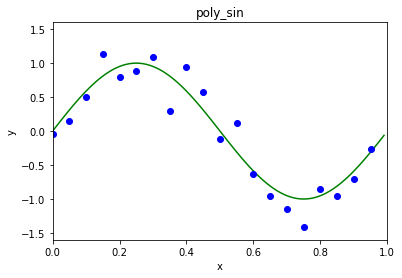

In [3]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

W
 [-0.02893869]


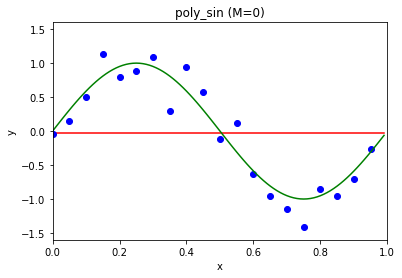

MSE= 0.6162846259148467
AIC= -7.680927342132298
W
 [ 0.9078579  -1.97220335]


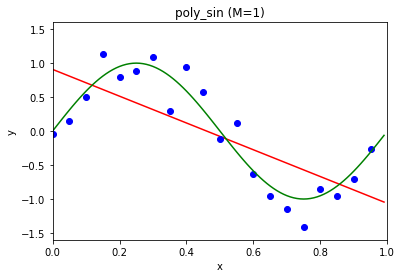

MSE= 0.29296278523935293
AIC= -20.55419381733712
W
 [ 0.63587923 -0.15901226 -1.9086222 ]


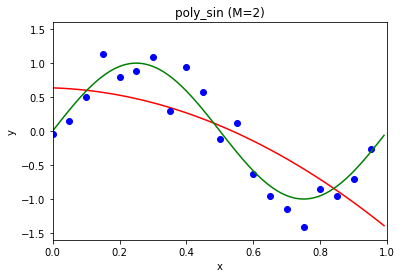

MSE= 0.2729772614391304
AIC= -19.967335573957158
W
 [ -0.27264958  13.03606396 -37.53720318  25.00251297]


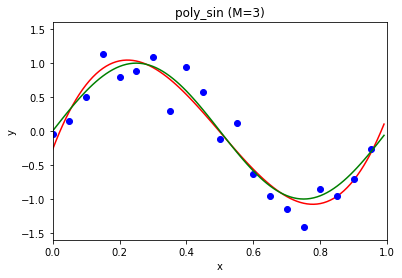

MSE= 0.05746392210982136
AIC= -49.13195939341987
W
 [ -0.11527062   8.72871506 -15.90233369 -10.99920918  18.94827482]


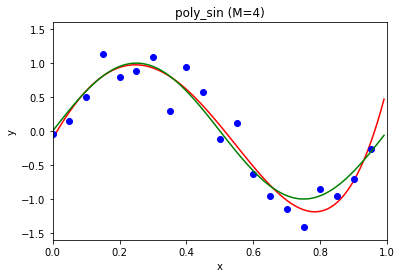

MSE= 0.04991931100674267
AIC= -49.946947139289534
W
 [-6.43278146e-02  6.25229347e+00  4.20009821e+00 -6.93897970e+01
  8.88697771e+01 -2.94406325e+01]


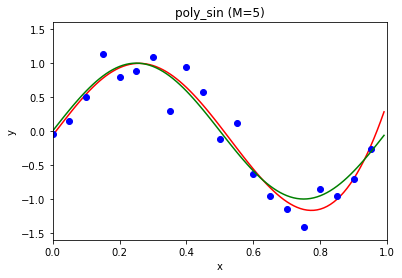

MSE= 0.048841338012798344
AIC= -48.38356468550901
W
 [-1.26071979e-01  1.15289982e+01 -5.95128912e+01  2.13301621e+02
 -4.81631856e+02  5.03254116e+02 -1.86910438e+02]


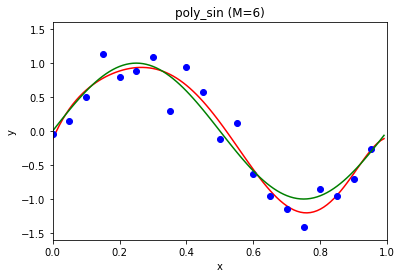

MSE= 0.04635288993440151
AIC= -47.42943277314389
W
 [-8.93963493e-02  5.86830694e+00  3.63099821e+01 -3.86666012e+02
  1.31139894e+03 -2.25568181e+03  1.92253756e+03 -6.34420450e+02]


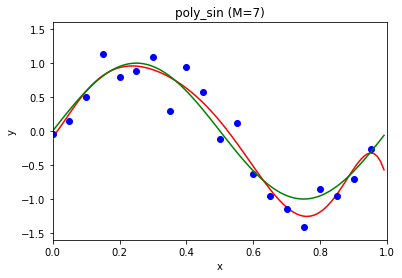

MSE= 0.044772499353711505
AIC= -46.123223635166454
W
 [-3.45368429e-02 -1.03816336e+01  4.03299139e+02 -3.45225503e+03
  1.38846681e+04 -3.03380155e+04  3.67555919e+04 -2.31724090e+04
  5.93104961e+03]


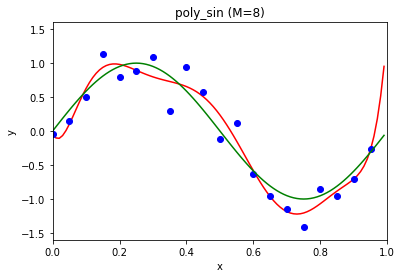

MSE= 0.03749250057641826
AIC= -47.67228701268421
W
 [-3.96330354e-02 -7.20129111e+00  3.11829878e+02 -2.47760226e+03
  8.68165296e+03 -1.46717198e+04  8.94337804e+03  5.68452506e+03
 -1.02471237e+04  3.78436632e+03]


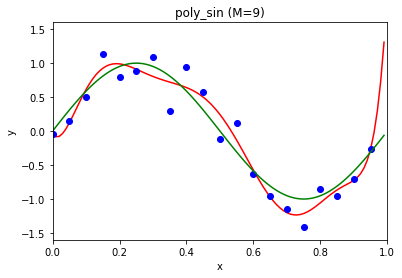

MSE= 0.03734431080528844
AIC= -45.75149400297806
AIC[9]=-45.751494


In [4]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]

AIC = np.zeros(len(search_range))

for M in search_range:

    W = E(x_train, y_train, M)
    print('W\n', W)

    y_estimate_aic = [y(x, W, M) for x in x_train]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train, y_train, 'bo')
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_train - y_estimate_aic)).mean()
    print('MSE=', mse)
    AIC[M] = N*np.log(mse) + 2*(M+1)
    print('AIC=', AIC[M])

print('AIC[%d]=%f'% (M, AIC[M]))



AIC
 [ -7.68092734 -20.55419382 -19.96733557 -49.13195939 -49.94694714
 -48.38356469 -47.42943277 -46.12322364 -47.67228701 -45.751494  ]
The best order of the model is 4


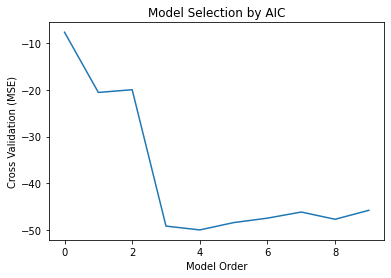

In [5]:
print('AIC\n', AIC)
print('The best order of the model is %d' % (np.argmin(AIC)))
                                                       
                                                       
plt.plot(AIC)
plt.title("Model Selection by AIC")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_AIC.eps')
plt.show()
plt.close()
